# Análisis estadístico

## introducción a las pruebas de hipótesis
Spongamos que se nos da una moneda y al tirarla 30 veces nos da 22 soles y 8 águilas. 
¿La moneda es justa?

- "Hipótesis nula": El resultado observado se debe al azar y la moneda es justa.
- "Hipótesis alternativa": La negación de la hipótesis nula, la moneda no es justa.


La probabilidad de obtener $k$ soles en $n$ volados donde la probabilidad de obtener sol en un volado es $p$, está dada por:

$$P(X= k) = \binom{n}{k} \, (1 - p)^{n - k}$$


**Demostración**.
Una sucesión de $n$ volados se puede representar como una sucesión de letras $A$/$S$ (águila o sol). Por ejemplo,
$$ASASASAASAA$$

- Si en $n$ volados ocurre $k$ veces sol, es equivalente a seleccionar $k$ símbolos de la sucesión y relenarlos con $S$ y el resto con $A$. Esto se puede hacer en $\binom{n}{k}$ formas distintas.
- La probabilidad de cada sucesión de  $k$ soles en $n$ volados es la probabilidad de obtener $k$ soles y $n-k$ águilas; es decir:  $p^k\,(1 - p)^{n - k}$.

Por lo tanto la probailidad de obtener $k$ soles (en cualquier orden) en $n$ volados es: $\binom{n}{k} \, (1 - p)^{n - k}$ (Demostrado)

In [1]:
import fractions
n, r= (20, 7)
L= list(range(n, n-r, -1))
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def permutacion_sin_repeticion(n, r):

    accum= 1
    for x in range(n, n - r, -1):
        accum *= x
    return accum
    
    
def factorial(n):
    accum= 1
    for x in range(2, n+1):
        accum*= x
    return accum
    
def combinaciones(n, k): 
    permutacion_sin_repeticion(n, k)// factorial(k)
    
def probabilidad(n, k, p):
    return (combinaciones(n,k)) * (p**k) * (1-p)**(n-k)
    

In [3]:
p= probabilidad(30, 22, fractions.Fraction(1/2))
print("La probabilidad de 22 soles en 30 volados es: ", p, ", o aprox: ", float(p))

TypeError: unsupported operand type(s) for *: 'NoneType' and 'Fraction'

In [4]:
n, p= (30, 1/2) 

lista_k= list(range(31))
probabilidades= [probabilidad(n,k,p) for k in lista_k]
df= pd.DataFrame({
    "k": list(range)
    "p":
})

SyntaxError: invalid syntax (<ipython-input-4-498066cb506b>, line 7)

In [5]:
plt.plot(df["k"], df["P"], ".")
plt.xlabel("Cantidad de soles")
plt.ylabel("Probabilidad en 30 volados")


NameError: name 'df' is not defined

Probabilidad de ver entre 9 y 21 soles en 30 volados: 

In [ ]:
df[ (df["k"]>= 9 & df["k"]<= 21)]["S"].sum()

Probabilidad de No ver entre 9 y 21 volados:

In [ ]:
1 - _

Este valor de observar el fenómeno por puro azar (la probabilidad de observar estos datos con la hipótesis nula) se le llama el **p - valor**.

- Rechazamos la hipótesis nula cuando el $p$- valor es muy pequeño.
- Aceptamos la hipótesis nula cuando el $p$- valor está sobre cierto umbral.

Prueba de hipótesis| Aceptar $H_0$   | Rechazar $H_0$ 
------------------|--------------------------------|--------------- 
$H_0$ es verdadera |    bien                        | Error tipo 1 (Falso positivo)
$H_0$ es falsa     | Error tipo II (falso negativo) | bien


## Método alternativo: simulación

In [9]:
import numpy as np
import numba
from scipy import stats
import matplotlib.pylab as plt

import itertools 

In [10]:
# @numba.jit
def calcular_P(n, p, repeticiones= 1_000):
    M= 0

    #simula un experimento
    for i in range(repeticiones):
        k= np.sum(np.random.random(size= n) < p)
        M += int((k > 21) or (k < 8))

    return M/repeticiones    


In [11]:
print(calcular_P(30, 0.5))

0.008


## Prueba de permutaciones aleatorias para la diferencia de medias

In [12]:
x= [1.1, 3.0, 2.8, 1.9, 2.5, 2.6]
y= [8.1, 3.5, 5.4, 2.4, 3.0, 4.1]


In [13]:
def comparar_normales(x, y):
    N1= stats.norm(np.mean(x), np.std(x))
    N2= stats.norm(np.mean(y), np.std(y))


    a,b= min(itertools.chain(x,y)), max(itertools.chain(x, y))
    dominio= np.linspace(a, b)

    plt.plot(dominio, N1.pdf(dominio), color= "blue")

    plt.plot(dominio, N2.pdf(dominio), color= "red")
    
comparar_normales(x,y)

TypeError: 'int' object is not callable

# Podemos comparar el area bajo la curva que tienen en común y la que no tienen en común, dado que es menor, las muestras son de distintas poblaciones

In [14]:
x= np.random.normal(loc=5, scale=3, size= 30 )
y= np.random.normal(loc=6, scale=3, size= 40 )

comparar_normales(x, y)

TypeError: 'int' object is not callable

In [15]:
z= np.concatenate([x,y])
np.random.shuffle(z)
z

array([ 9.76231574, 10.02289877,  3.99685225,  4.73320061,  1.67903526,
        0.22970382,  4.21117641,  4.25268671,  7.67647796,  6.66186047,
        6.69369232,  5.34605788,  9.14193948,  6.87434433,  7.78715282,
        4.88442936, 11.11328799,  2.66750011,  8.77649252, -1.21461535,
        2.60947951,  6.12905958, 12.04437829,  5.88590046,  6.06782645,
        3.85670642,  9.93880722,  1.37594642,  1.0898746 ,  5.77488145,
        2.78689009,  0.76466809, 10.85717791,  5.25596903,  7.58178372,
        0.14176321,  8.9384681 ,  8.71792853,  3.46671344,  2.1161271 ,
       11.87557391,  8.95728975,  0.60406897,  7.44582614, 12.45261924,
        3.35437585,  4.24034581,  3.74671175,  0.64829914,  9.29400122,
        4.1893763 ,  4.17032831,  2.19780191,  7.62372752,  5.10299296,
        7.56995582,  6.88592645,  0.60876513, 10.82273919,  2.07574247,
        5.22831398,  3.40383011,  3.15332233, 10.28772578,  5.6707505 ,
        1.06389257,  0.21838177,  7.42604038,  5.15255846,  6.20

0.078306

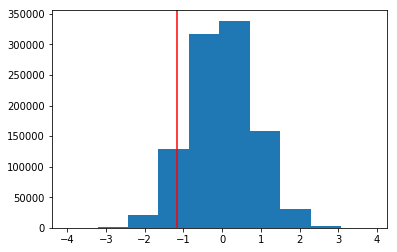

In [16]:
#Recreamos los x y y (simulamos)

def prueba_diferencia_medias(x, y, repeticiones= 1_000_000):

    diferencias= []
    diferencia_Real= np.mean(x) - np.mean(y)

    for i in range(repeticiones):

        np.random.shuffle(z)
        x_simulado= z[:len(x)]
        y_simulado= z[len(x):]
        diferencias.append( np.mean(x_simulado) - np.mean(y_simulado) )

        
    plt.hist(diferencias)    
    plt.axvline(diferencia_Real, color= "red")
    return np.sum(np.array(diferencias) <= diferencia_Real)/ repeticiones


prueba_diferencia_medias(x, y)


### Si está pegada la diferencia real de la simulada las muestras pertenecen a la misma población.

## Intervalos de confianza para la media

In [17]:
import random

In [18]:
def bootstrap_remplazo(N, repeticiones= 100_000):
    
    print("N: ", N)
    xbar= np.zeros(repeticiones)
    media_Real= np.mean(N)
    print("Media Real: ", media_Real)
    
    for i in range(repeticiones):
        sample= N[np.random.randint(len(N), size= len(N))]
        xbar[i]= np.mean(sample)
 
    results= np.mean(xbar)
    print("Media de las medias: ", results)
    
    desviacion_std= np.std(xbar)
    print("Desviación estándar de medias: ", desviacion_std)

    #Graficamos
    plt.hist(xbar, 50, facecolor='green')   
    plt.axvline(media_Real, color= "red" )
#     plt.axvline(results, color= "black" )
    
    plt.xlabel('Medias')
    plt.ylabel('Cantidad')
    plt.title(f'Histograma de Medias')

    return results, desviacion_std


N:  [37 44 46  5 44 48 35 16 25 37  4 36 18 17 20 34 36 21 13 28]
Media Real:  28.2
Media de las medias:  28.208636999999992
Desviación estándar de medias:  2.9323643876965564


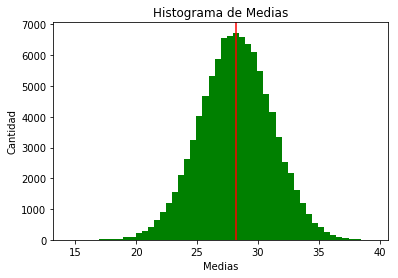

In [19]:
#Creamos los datos
max= 50
min= 1
N= np.random.randint(min, max, size= 20) #enteros positivos porque son turtugas! xD

#LLamamos a la función
results, desviacion_std= bootstrap_remplazo(N)

# Estimación de media poblacional

In [20]:
def bootstrap_remplazo(N, repeticiones= 100_000):
    
    print("N: ", N)
    xbar= np.zeros(repeticiones)
    media_Real= np.mean(N)
    print("Media Real: ", media_Real)
    
    for i in range(repeticiones):
        sample= N[np.random.randint(len(N), size= len(N))]
        xbar[i]= np.mean(sample)
 
    results= np.mean(xbar)
    print("Media de las medias: ", results)
    
    desviacion_std= np.std(xbar)
    print("Desviación estándar de medias: ", desviacion_std)
    
    confianza= 95
    a= (100- confianza)/2
    b= 100 - a
    percentil= np.percentile(xbar, [a, b])
       
    print("El valor de la media poblacional con un ", confianza, "% de seguridad está entre: ", percentil)
    
    return results, desviacion_std


In [21]:
#Creamos los datos
max= 50
min= 1
N= np.random.randint(min, max, size= 20) #enteros positivos porque son turtugas! xD

#LLamamos a la función
results, desviacion_std= bootstrap_remplazo(N)

N:  [45  7  8 38 14  5 26 32 32 27 26 16 40 24  9 42 15 18 19 17]
Media Real:  23.0
Media de las medias:  22.993308499999998
Desviación estándar de medias:  2.6563058462510956
El valor de la media poblacional con un  95 % de seguridad está entre:  [17.85 28.25]
